In [1]:
import sys
from tqdm import tqdm_notebook as tqdm

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sys.path.append('../')
from tools.utils.visualizations import num_feature_comp_hist

In [2]:
# re-load functions
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
trn_df = pd.read_csv('../mnt/inputs/origin/train.csv.zip').set_index('ID_code')
tst_df = pd.read_csv('../mnt/inputs/origin/test.csv.zip').set_index('ID_code')
trn_df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## train data の unique col analysis

In [4]:
res_df = pd.DataFrame()
res_df['ID_code'] = trn_df.reset_index()['ID_code']

for col in tqdm(trn_df.columns):
    cnt_dict = trn_df[col].value_counts().to_dict()
    res_df[col] = trn_df[col].apply(lambda x: cnt_dict[x] == 1).values

In [5]:
res_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,train_1,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,True
2,train_2,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,train_3,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,train_4,False,False,False,False,False,False,True,False,True,...,False,False,True,True,True,False,False,False,False,False


In [6]:
res_df.sum()

ID_code    train_0train_1train_2train_3train_4train_5trai...
target                                                 False
var_0                                                  40355
var_1                                                  54687
var_2                                                  32703
var_3                                                  22480
var_4                                                  15530
var_5                                                  96604
var_6                                                   6319
var_7                                                  47154
var_8                                                  42556
var_9                                                   8558
var_10                                                 78867
var_11                                                 81636
var_12                                                   476
var_13                                                 61559
var_14                  

In [11]:
res_df.iloc[:, 2:].sum().sum(), 200000 * 200

(10832700, 40000000)

In [23]:
a = res_df.sum(axis=1).value_counts()
a

54    13884
53    13879
55    13817
56    13445
52    13175
57    12277
51    12054
58    11033
50    11009
59     9643
49     9396
60     8111
48     7897
61     6835
47     6513
62     5384
46     5097
63     4145
45     3836
64     3095
44     2832
65     2363
43     1967
66     1528
42     1371
67     1113
41      911
68      744
40      562
69      495
39      347
70      337
38      196
71      178
37      129
72      115
36       63
73       61
74       43
35       43
34       19
75       18
33       12
76        8
77        7
78        5
32        3
31        2
79        2
29        1
dtype: int64

In [24]:
a.index.sort_values()

Int64Index([29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
            64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
           dtype='int64')

In [ ]:
tst_res_df = pd.DataFrame()
tst_res_df['ID_code'] = tst_df.reset_index()['ID_code']

for col in tqdm(tst_df.columns):
    cnt_dict = tst_df[col].value_counts().to_dict()
    tst_res_df[col] = tst_df[col].apply(lambda x: cnt_dict[x] == 1).values

In [ ]:
b = tst_res_df.sum(axis=1).value_counts()
b

## 同じ値の行数を入れた df を作成

In [ ]:
res_df = pd.DataFrame()
res_df['ID_code'] = trn_df.reset_index()['ID_code']

for col in tqdm(trn_df.columns):
    cnt_dict = trn_df[col].value_counts().to_dict()
    res_df[col] = trn_df[col].apply(lambda x: cnt_dict[x]).values

In [ ]:
res_df.head()

In [ ]:
_res_df = res_df.set_index('ID_code').drop('target', axis=1)
_res_df.sum(axis=0)

In [ ]:
a = _res_df.sum(axis=1).value_counts()
a

In [ ]:
a.shape

In [ ]:
trn_df.drop('target', axis=1).drop_duplicates().shape

In [4]:
res_df = pd.DataFrame()
res_df['ID_code'] = tst_df.reset_index()['ID_code']

for col in tqdm(tst_df.columns):
    cnt_dict = tst_df[col].value_counts().to_dict()
    res_df[col] = tst_df[col].apply(lambda x: cnt_dict[x]).values

In [5]:
_res_df = res_df.set_index('ID_code')#.drop('target', axis=1)
_res_df.sum(axis=0)

var_0       882518
var_1       793518
var_2       945350
var_3      1034292
var_4      1179550
var_5       653752
var_6      1805644
var_7       819260
var_8       849724
var_9      1408116
var_10      698734
var_11      695372
var_12     6612334
var_13      762250
var_14      984582
var_15     3159248
var_16      941962
var_17      660760
var_18      659498
var_19      644552
var_20      704958
var_21      659570
var_22      912408
var_23     2579930
var_24      813234
var_25     4392250
var_26      710732
var_27     1212118
var_28     1919228
var_29      931682
            ...   
var_170     770972
var_171     712684
var_172     650746
var_173     704220
var_174     678880
var_175     893170
var_176     646084
var_177     943012
var_178     641202
var_179     921458
var_180     724406
var_181    1325558
var_182     624796
var_183     745226
var_184     642106
var_185     734218
var_186     859654
var_187     603110
var_188     797206
var_189    1622090
var_190     766206
var_191     

In [6]:
b = _res_df.sum(axis=1).value_counts()
b

2139    384
2115    382
2142    382
2153    379
2154    372
2125    371
2156    371
2136    369
2157    369
2141    369
2144    368
2130    366
2096    366
2081    363
2129    362
2148    362
2104    361
2173    360
2128    359
2158    358
2151    358
2118    357
2105    356
2073    354
2102    354
2143    352
2123    351
2088    351
2110    351
2149    349
       ... 
2748      1
2767      1
1013      1
2924      1
2630      1
1050      1
1058      1
2867      1
1039      1
2724      1
2703      1
2818      1
1049      1
2728      1
2608      1
2781      1
2764      1
2653      1
1038      1
2726      1
2756      1
2673      1
2771      1
1041      1
2736      1
2821      1
2708      1
1018      1
2656      1
2735      1
Length: 1711, dtype: int64

## duplication logic で fake data を作っている tst_df にくらべて trn_df は重なりが多すぎない...？

## fake data の 予測値分布を見てみたい

In [4]:
sub_df = pd.read_csv('../mnt/submissions/e004_reproduction_of_900_kernel_w_same_params_2019-03-25-08-03-16_0.89995_sub.csv.gz')
sub_df.head()

,ID_code,target
0,test_0,0.747922
1,test_1,0.875569
2,test_2,0.882126
3,test_3,0.870822
4,test_4,0.551730


In [ ]:
sub_df = pd.read_csv('../mnt/submissions/e004_reproduction_of_900_kernel_w_same_params_2019-03-25-08-03-16_0.89995_sub.csv.gz')
sub_df.head()

reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')
fakes = np.load('../mnt/inputs/nes_info/synthetic_samples_indexes.npz.npy')
publics = np.load('../mnt/inputs/nes_info/public_LB.npz.npy')
privates = np.load('../mnt/inputs/nes_info/private_LB.npz.npy')

plt.figure(figsize=(20, 5))
sub_df.iloc[reals].target.hist(alpha=0.6, color='r', bins=100, label='reals')
sub_df.iloc[fakes].target.hist(alpha=0.6, color='b', bins=100, label='fakes')
plt.legend()
plt.tight_layout()

In [18]:
reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')
fakes = np.load('../mnt/inputs/nes_info/synthetic_samples_indexes.npz.npy')
publics = np.load('../mnt/inputs/nes_info/public_LB.npz.npy')
privates = np.load('../mnt/inputs/nes_info/private_LB.npz.npy')

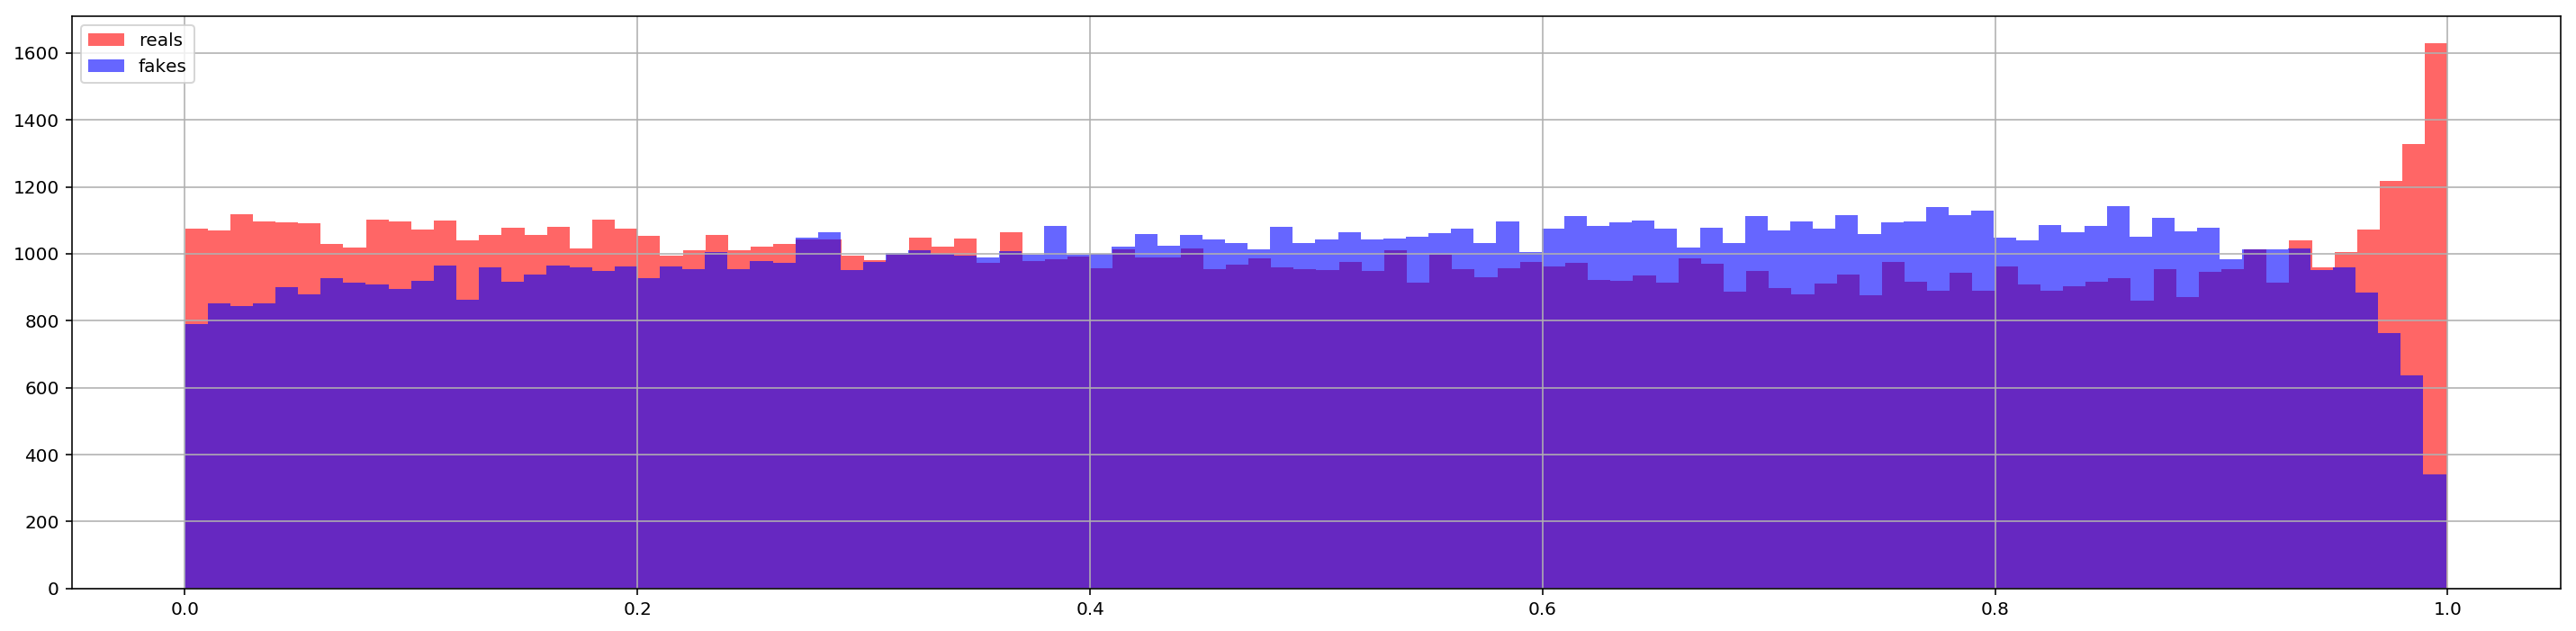

In [6]:
plt.figure(figsize=(20, 5))
sub_df.iloc[reals].target.hist(alpha=0.6, color='r', bins=100, label='reals')
sub_df.iloc[fakes].target.hist(alpha=0.6, color='b', bins=100, label='fakes')
plt.legend()
plt.tight_layout()

In [7]:
sub_df.iloc[reals].target.mean(), sub_df.iloc[fakes].target.mean()

(0.49260043654500174, 0.5074045634549975)

## uniq 系は target 0, 1 別に見てみたい

In [15]:
res_df = pd.DataFrame()
res_df['ID_code'] = trn_df.reset_index()['ID_code']
res_df['target'] = trn_df['target'].values

for col in tqdm(trn_df.iloc[:, 1:].columns):
    cnt_dict = trn_df[col].value_counts().to_dict()
    res_df[col] = trn_df[col].apply(lambda x: cnt_dict[x] == 1).values

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [20]:
res_df.query('target == 0').iloc[:, 2:].sum(axis=1).value_counts()

53    12567
54    12468
55    12445
56    12050
52    11920
51    10948
57    10931
50    10028
58     9815
59     8590
49     8508
60     7205
48     7172
61     6038
47     5985
62     4746
46     4687
63     3652
45     3511
64     2726
44     2637
65     2062
43     1815
66     1318
42     1268
67      960
41      847
68      635
40      529
69      433
39      323
70      273
38      186
71      157
37      118
72       94
36       58
73       48
35       41
74       37
34       18
75       15
33       12
77        7
76        7
78        5
32        3
31        2
79        1
29        1
dtype: int64

In [18]:
res_df.query('target == 1').iloc[:, 2:].sum(axis=1).value_counts()

54    1416
56    1395
55    1372
57    1346
53    1312
52    1255
58    1218
51    1106
59    1053
50     981
60     906
49     888
61     797
48     725
62     638
47     528
63     493
46     410
64     369
45     325
65     301
66     210
44     195
67     153
43     152
68     109
42     103
70      64
41      64
69      62
40      33
39      24
71      21
72      21
73      13
37      11
38      10
74       6
36       5
75       3
35       2
34       1
76       1
79       1
dtype: int64

In [20]:
res_df = pd.DataFrame()
res_df['ID_code'] = tst_df.iloc[reals].reset_index()['ID_code']
# res_df['target'] = tst_df['target'].values

for col in tqdm(tst_df.iloc[reals].iloc[:, 1:].columns):
    cnt_dict = tst_df.iloc[reals][col].value_counts().to_dict()
    res_df[col] = tst_df.iloc[reals][col].apply(lambda x: cnt_dict[x] == 1).values

In [10]:
res_df.head()

,ID_code,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,test_1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,test_2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,test_3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,test_4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
res_df.iloc[:, 1:].sum(axis=1).value_counts()

0     100000
31      7906
32      7786
33      7653
30      7315
34      7265
35      6670
29      6643
36      5832
28      5768
37      4900
27      4736
38      4057
26      3779
39      3189
25      2894
40      2452
24      2077
41      1721
23      1447
42      1245
22       908
43       842
21       597
44       571
45       392
20       355
46       234
19       225
47       170
18        82
48        81
17        54
49        54
16        33
50        28
15        12
51        12
52         7
53         2
13         2
14         1
12         1
10         1
56         1
dtype: int64

In [16]:
# train
res_df.iloc[:, 1:].sum(axis=1).value_counts().reset_index().sort_values('index')

,index,0
50,29.0,1
47,31.0,2
46,32.0,3
42,33.0,12
41,34.0,18
39,35.0,42
37,36.0,60
34,37.0,123
33,38.0,197
31,39.0,333


In [14]:
# test
res_df.iloc[:, 1:].sum(axis=1).value_counts().reset_index().sort_values('index')

,index,0
0,0,100000
43,10,1
42,12,1
40,13,2
41,14,1
36,15,12
34,16,33
32,17,54
30,18,82
28,19,225


In [21]:
# test real
res_df.iloc[:, 1:].sum(axis=1).value_counts().reset_index().sort_values('index')

,index,0
50,61,2
48,62,2
46,63,5
51,64,2
43,65,12
42,66,13
41,67,18
39,68,32
37,69,59
35,70,102
